Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 4 </h2>
    <h1> MLP y Regresión Logística </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: 20 de Octubre
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

A continuación se encuentran las librerías necesarias para elaborar la tarea. Recuerda ejecutar la celda antes de comenzar.

In [1]:
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from typing import List
import seaborn as sns

## Contexto: Cáncer de mama

Octubre es dedicado como el "Mes de la Sensibilización sobre el Cáncer de Mama". Este tipo de cáncer afecta a millones de personas en el mundo, y a pesar de los avances médicos y campañas de sensibilización, sigue siendo una de las principales causas de muerte en mujeres.Uno de los desafíos más significativos es que, en muchos casos, el cáncer de mama no presenta síntomas evidentes en sus etapas iniciales. Esto significa que la detección temprana a través de exámenes regulares y la autoexploración mamaria son cruciales para mejorar las tasas de supervivencia y reducir la gravedad de la enfermedad en el momento del diagnóstico.


En el ámbito de la minería de datos, las herramientas y técnicas que se enseñan en este curso adquieren un valor excepcional en el campo de la salud, especialmente en lo que respecta a la detección de enfermedades. La minería de datos ofrece una poderosa capacidad para analizar grandes conjuntos de información médica, identificar patrones y tendencias ocultas, y desarrollar modelos predictivos precisos. Por lo tanto, deseamos destacar la utilidad de los conocimientos y modelos que se adquieren en este curso, ya que tienen un impacto real y significativo en la ciencia médica.

Gracias a la aplicación de la minería de datos, podemos mejorar sustancialmente la eficiencia de la detección de enfermedades. Esto significa que podemos identificar señales tempranas de enfermedades, realizar diagnósticos más precisos y predecir la progresión de condiciones médicas. En última instancia, esta capacidad tiene el potencial de salvar vidas al permitir intervenciones médicas más oportunas y efectivas.

## Bonus (3 puntos) 🔥

Al momento de escribir codigo es importante asegurarnos de que tanto nosotros como otras personas seran capaces de entenderlo. Con este fin, se utilizan diferentes medios como por ejemplo los comentarios al momento de implementar, docstrings para metodos, clases y modulos, type-hinting, entre otros. Debido a lo importante de esto, es que en esta tarea se otorgara un bonus de 3 puntos por el correcto uso de type-hinting al momento de declarar variables y funciones.

## Parte 1: Carga y Preprocesamiento de Datos (10 Pts.)

Para esta tarea, deberás utilizar el dataset [Breast Cancer Wisconsin](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) que se puede encontrar en Kaggle.

### 1.1 Carga de Datos (1 Pts.)

In [2]:
data: pd.DataFrame = pd.read_csv('breast_cancer_dataset.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 1.2 Descripción del Dataset (3 Pts.)
A continuación, presenta una descripción detallada del dataset. Se espera que investigues los datos, y expliques en que consisten al menos 9 columnas. Dentro de la explicación, menciona a qué tipo de datos corresponde cada columna. ¿Cuál es la columna objetivo? ¿Qué significa cada valor de esta columna?

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

El dataset contiene datos que describen las caracteristicas de los nucleos celulares presentes en imagenes digitalizadas de un FNA (Fine Needle Aspiration) de una masa mamaria. Estos datos se utilizaran para predecir si la masa es maligna o benigna.
1. `Diagnosis` [str]: Diagnostico, *M* = Maligno, *B* = Benigno.  
Columas respect a la media de los nucleos celulares:
1. `radius_mean` [float]: promedio de distancias desde el centro a puntos del perímetro del nucleo
2. `texture_mean` [float]: desviación estándar de valores de escala de grises
3. `perimeter_mean` [float]: tamaño del núcleo
4. `area_mean` [float]: área de la masa
5. `smoothness_mean` [float]: variación local en longitudes de radios del nucleo
6. `compactness_mean` [float]: perímetro^2 / área - 1.0
7. `concavity_mean` [float]: severidad de las porciones cóncavas del contorno
8. `concave points_mean` [float]: número de porciones cóncavas del contorno
9. `symmetry_mean` [float]: simetría promedio del nucleo

Existen muchas columnas que hacen referencias a metricas similares, por ejemplo esta la columna de *radio promedio*, *radio SE* y *peor radio*.

### 1.3 Limpieza del set de datos (3 Pts.)

En esta sección, deberás revisar el dataset y hacer una limpieza de los datos. Esto significa que deberás tratar posibles `datos nulos, outliers, columnas innecesarias`, etc. 🧐 Además, es importante que utilices One Hot Encoding para el diagnóstico, dejando 0 a las muestras benignas y 1 a las malignas.

**IMPORTANTE:** más allá del código, lo más importante aquí es `explicar` lo que estás haciendo, las decisiones para limpiar que tomas y sobre todo `justificar`. Hay libertad en cuanto a lo que se puede hacer, pero es **importante** que se justifique cualquier procedimiento.

Primero revisare la cantidad de valores únicos por columna y si hay valores nulos en cada columna.


In [5]:
pd.DataFrame([data.nunique(), data.isna().sum()], columns=data.columns, index=['unique', 'missing']).T

,unique,missing
id,569,0
diagnosis,2,0
radius_mean,456,0
texture_mean,479,0
perimeter_mean,522,0
area_mean,539,0
smoothness_mean,474,0
compactness_mean,537,0
concavity_mean,537,0
concave points_mean,542,0


El ID no aporta informacion util a los datos asi que se eliminar, también se eliminara 'Unnamed: 32' ya que solo contiene valores nulos.

In [6]:
X_data : pd.DataFrame = data.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
y_data : pd.Series = data['diagnosis']

Se realiza OneHot encodeing, M -> 1, B -> 0

In [7]:
y_data = y_data.apply(lambda x: 1 if x == 'M' else 0)

Busqueda de outliers

In [8]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof.fit_predict(X_data)
scores = lof.negative_outlier_factor_

In [9]:
import numpy as np

def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

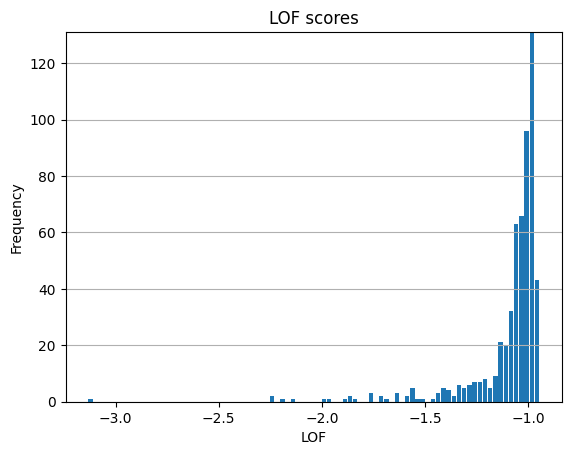

In [10]:
plot_hist(scores, 'LOF scores')

Se puede ver que existen algunos outliers menores a `-3.0`.

In [11]:
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold

lof_threshold(-3,scores)
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.0096)
labels = lof.fit_predict(X_data)

indices = list(np.where(labels==1)[0])
X_ = X_data.iloc[indices]
y_ = y_data[indices]

In [12]:
np.unique(labels, return_counts=True)

(array([-1,  1]), array([  6, 563], dtype=int64))

Se quitaron 6 outliers del dataset.

### 1.4 Normalización de datos (3 Pts.)

Normaliza los datos y responde las preguntas:
1. ¿Por qué es necesario normalizar los datos?
2. ¿Qué tipo de normalización se utilizó? ¿Por qué?
3. ¿Qué columnas se normalizaron? ¿Por qué?
4. Explique la diferencia entre el uso de `standard scaler` y `minmax scaler` como estrategia para normalizar.

In [13]:
X_.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,563.0,14.088016,3.439590,6.981000,11.705000,13.340000,15.780000,27.22000
texture_mean,563.0,19.264813,4.305374,9.710000,16.165000,18.830000,21.790000,39.28000
perimeter_mean,563.0,91.685861,23.698210,43.790000,75.100000,86.180000,103.950000,182.10000
area_mean,563.0,649.139076,335.550534,143.500000,420.300000,546.400000,781.800000,2250.00000
smoothness_mean,563.0,0.096194,0.013957,0.052630,0.086025,0.095790,0.105100,0.16340
compactness_mean,563.0,0.103850,0.052230,0.019380,0.065090,0.092420,0.130100,0.34540
concavity_mean,563.0,0.087742,0.078292,0.000000,0.029570,0.061260,0.126950,0.42680
concave points_mean,563.0,0.048443,0.038254,0.000000,0.020310,0.033410,0.072020,0.20120
symmetry_mean,563.0,0.181057,0.027257,0.106000,0.161950,0.179200,0.195500,0.30400
fractal_dimension_mean,563.0,0.062752,0.006915,0.049960,0.057800,0.061540,0.066100,0.09575


1. Se puede ver en `X_.describe()` que los datos tienen diferentes rangos, por lo que para poder compararlos es necesario normalizarlos. 

In [14]:
data2 = pd.concat([X_data, y_data], axis=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_ = min_max_scaler.fit_transform(X_)

Se utiliza MinMaxScaler para escalar los datos linealmente a una escala entre 0 y 1.

### 1.5 Partición training/testing (0 Pts.)
Cree particiones de training/testing con test_size=0.3. Recuerda recuperar la variable objetivo "y" del dataset y `separarla` de los datos.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)

## Parte 2: Perceptron y Multi Layer Perceptrón (25 Pts.)

### 2.1 Perceptron (5 Pts.)
Investigue sobre `Perceptron`🤖 y de una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para `demostrar tu aprendizaje` 🚀. Se espera que tu explicación contenga la respuesta a las siguientes preguntas: ¿Qué es? ¿Para qué sirve? ¿Cómo funciona? ¿Cuáles son sus ventajas y desventajas? ¿En qué situaciones se puede utilizar? ¿Qué tipo de problemas puede resolver? ¿Qué son los pesos y función de activación? ¿Cuáles son las limitaciones del modelo?

### El Perceptron

<img width=30% src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*qCAeeOT6O_l-HI2dC7DXig.png"/>

Es un algoritmo utilizado para aprendizaje supervizado en clasificadores binarios. Se basa en separar linealmente los datos, es decir, encontrar una linea que separe los datos en dos grupos. Para esto se utilizan los pesos y la función de activación.

Los pesos son los coeficientes de la función de activación (en clases vistos como $\hat{w}$), estos se van actualizando en cada iteración del algoritmo. La función de activación es la función que se aplica a la suma ponderada de los inputs y los pesos, esta función es la que determina si el perceptron se activa o no y para el perceptron lineal es la funcion $Sign()$, $\theta = Sign(w^T x)$.

Como funciona:

Recibe entradas numericas, cada entrada esta asociada a un peso, cada entrada se multiplica por su peso y se suman todos los resultados. Luego la suma ponderada se pasa por la funcion de activación, si esta es mayor a 0 el perceptron se activa y emite como salida un 1 (generalmente). Y si es menor a 0 no se activa, dando una salida 0 (generalmente).

Sus ventajas: 
- Implementación simple.
- Es un modelo lineal, por lo que es facil de interpretar (realiza una separación lineal sobre los datos).
- Se puede utilizar como componente básico de una red más compleja.

Sus desventajas:
- Solo sirve para problemas de clasificación binaria
- No puede resolver problemas que no sean linealmente separables (sin modificaciones, se puede hacer con un perceptron multicapa)
- Al realizar una separación lineal es sensible a outliers.

Uso: En tareas de clasificación binaria.

Limitaciones: No puede resolver problemas que no sean linealmente separables, sensible a datos ruidosos y no puede converger en algunos casos.

### 2.2 Multi Layer Perceptron (5 Pts.)
Ahora debes investigar sobre `Multi Layer Perceptron (MLP)` y nuevamente explicar con tus propias palabras cómo funciona. Debes poner énfasis en las principales diferencias y cambios que tiene con respecto al `Perceptron`. Agrega en tu desarrollo la respuesta a la siguiente pregunta: ¿Por qué es conveniente utilizar MLP para el dataset presentado en esta tarea?

MLP es una extensión del perceptrón simple.

Es un algoritmo de aprendizaje supervisado que aprende una función $f( \cdot ):R^m \rightarrow R^o$ al entrenar sobre un dataset donde $m$ es el numero de dimensiones del input y $o$ es el nuemro de dimensiones del output. Dado un conjunto de features $X = {x_1, x_2, ..., x_m}$ y un target $y$, puede aprender una aproximacion de funcion no lienar para clasificación o regresión.

Entre la capa de entrada y salida, puede haber una o más capas no lineales, llamadas capas ocultas, esto se ilustra en la siguiente imagen extraida de la [documentación de sklearn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

<img class="white-background" width="30%" src="https://scikit-learn.org/stable/_images/multilayerperceptron_network.png">
<style>
  .white-background {
    background-color: white;
    display: inline-block;
  }
</style>

Para el aprendizaje, MLP utiliza técnicas de aprendizaje supervisado, como el descenso grandiente, para ajustar los pesos de las conexiones entre las neuronas, con el objetivo de minimizar el error en las predicciones.

Respecto al perceptron simple que tiene solo una capa de salida, MLP tiene una o más capas ocultas que permiten aprender relaciones no lineales entre los datos. Además, MLP utiliza funciones no lineales como función de activación (por ejemplo, la funcion sigmoide, RELU, entre otras). Por último, MLP permite resolución de problemas más complejos que el perceptrón simple, como la clasificacion de multples clases, regresión y problemas no linealmente separables.


Considerando las caracteristicas más importantes del dataset, las que utilizan "mean". 

c:\Users\Gabi\Documents\U-2023-2\IIC2433\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


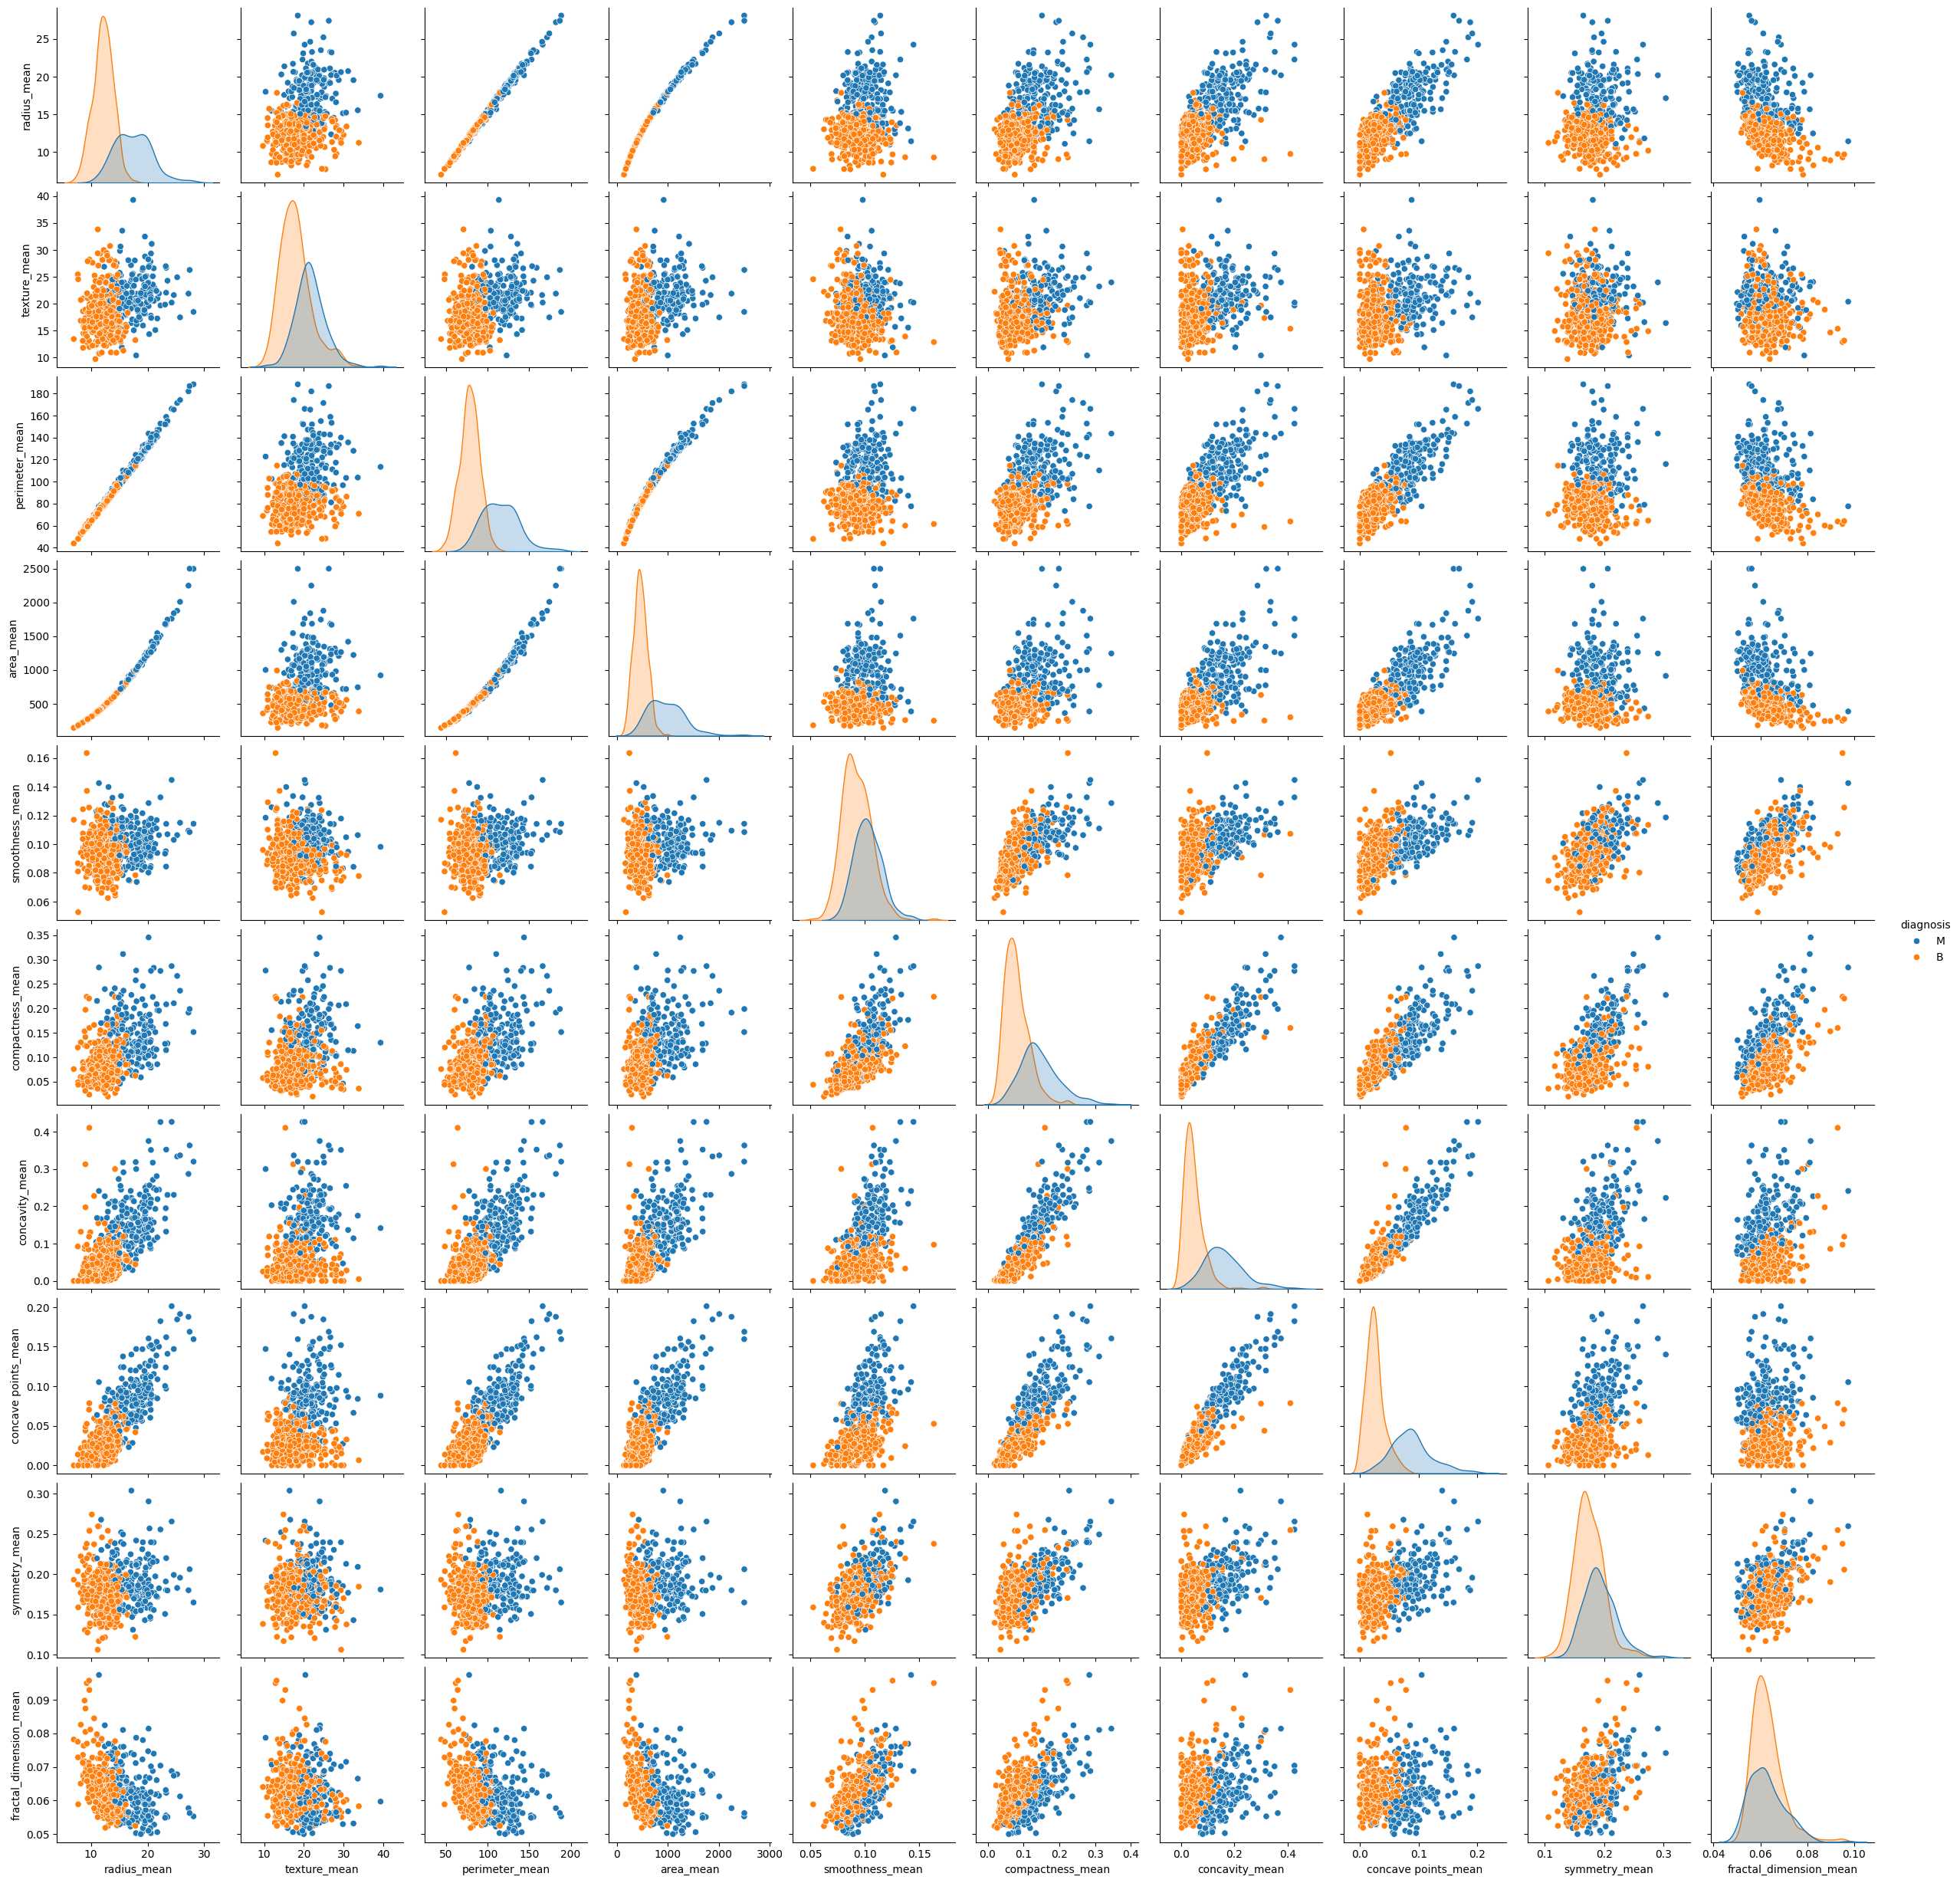

In [17]:
mean_data = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# plot mean_data by mean_data
sns.pairplot(data[mean_data], hue='diagnosis')
# sns.pairplot(data, diag_kind='kde', hue=data['diagnosis'])


se puede notar que pese a que los datos no son linealmente separables, si se pueden separar con una función no lineal, por lo que se puede utilizar un MLP para resolver el problema.

### 2.2 Crear y entrenar el modelo (7 Pts.)
Entrene un clasificador de MLP con los datos de `entrenamiento`. Tienes libertad para modificar los hiperparámetros, cantidad de capas, neuronas, etc. Pero toda decisión debe ser `justificada`. Recuerda que el objetivo es obtener el mejor modelo posible. Para justificar tus decisiones puedes experimentar, buscar documentación o lo que estimes conveniente.

**Importante:** No se evalúa que el modelo sea el mejor, si no que se justifiquen las decisiones tomadas. Es decir, no sirve de nada tener un porcentaje de acierto alto si no se justifica por qué se llegó a ese resultado.

---
Para realizar el modelo, me basé en lo visto en clases, donde se genera un modelo secuencial compuesto por capas densas, con una capa de entrada, una capa oculta y una capa de salida. Para cada capa oculta se utilizó la función de activación RELU y para la capa de salida se utilizó la función de activación sigmoide. Se utilizó la función de perdida sparse_categorical_crossentropy y el optimizador Adam.

In [18]:
X_train.shape

(394, 30)

In [31]:
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Input

mlp_model : Sequential = Sequential() # modelo MLP
num_classes = 2 # M, B
num_features = X_train.shape[1] # Cantidad de caracteristicas

mlp_model.add(Dense(128, activation='relu', input_shape=(num_features,))) # Capa de inputs
mlp_model.add(Dense(64, activation='relu')) # Capa oculta
mlp_model.add(Dense(num_classes, activation='softmax')) # Capa de salida

mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3968      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 12354 (48.26 KB)
Trainable params: 12354 (48.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# se define la funcion de perdida, el optimizador y las metricas
mlp_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
import tensorflow as tf

In [33]:
# se define el callback para detener el entrenamiento cuando la perdida no disminuya
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [34]:
mlp_model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=[callback])

Epoch 1/50


13/13 [==============================] - 1s 2ms/step - loss: 0.6452 - accuracy: 0.7513
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.8807
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8909
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.9162
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9391
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9289
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1564 - accuracy: 0.9416
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9569
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.9518
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9645
Epoch 11/50
13/13 [===========

Se puede notar que el entrenamiento se detuvo en la epoca 21, lo que quiere decir que el modelo no mejoró respecto a la perdida en las ultimas 3 iteraciones (gracias a la `patience` definida). Se decidio poner el parametro epocas en 50 para ver hasta donde llegaba el modelo sin detenerse. 

### 2.3 Evaluar el modelo (2 Pts.)
Evalúe el modelo con los datos de `testing` y calcule `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significan 👀.

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Y_preds = mlp_model.predict(X_test).argmax(axis=-1)

print("Test Accuracy : {}".format(accuracy_score(y_test, Y_preds)))
print("\nClassification Report : ")
print(classification_report(y_test, Y_preds))

6/6 [==============================] - 0s 2ms/step
Test Accuracy : 0.9644970414201184

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       105
           1       1.00      0.91      0.95        64

    accuracy                           0.96       169
   macro avg       0.97      0.95      0.96       169
weighted avg       0.97      0.96      0.96       169



In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

mlp_accuracy = accuracy_score(y_test, Y_preds)
mlp_precision = precision_score(y_test, Y_preds)
mlp_recall = recall_score(y_test, Y_preds)
mlp_f1 = f1_score(y_test, Y_preds)

print(f'accuracy_score : {mlp_accuracy},\nprecision_score : {mlp_precision},\nrecall_score : {mlp_recall},\nf1_score : {mlp_f1}')

accuracy_score : 0.9644970414201184,
precision_score : 1.0,
recall_score : 0.90625,
f1_score : 0.9508196721311475


Se obtuvieron valores altos para todas las métricas, esto quiere decir:
- Un alto accuracy, significa que gran parte de las pruebas fueron clasificadas correctamente.
- Un alto precision_score, signidica que de las predicciones positivas, la gran mayoria fueron correctas. (ej, una precission de 0.98 para 0, quiere decir que de las muestras clasificadas como 0/B, el 98% fueron correctas)
- Un alto recall, significa que el modelo identifico correctamente la gran mayoria de las muestras positivas. (ej, un recall de 0.98 para 0, quiere decir que de las muestras que eran 0/B, el 98% fueron identificadas correctamente)
- Un alto f1-score, significa que el modelo tiene un buen balance entre precision y recall.

### 2.4 Matriz de confusión (6 Pts.)
Genere una `matriz de confusión` normalizada del modelo y responda las preguntas:
1. ¿Qué significa cada fila de la matriz?
2. ¿Qué significa cada columna de la matriz?
3. Explique error `tipo I` y error `tipo II` en base a la matriz de confusión.
4. En relación al problema de cáncer de mama, ¿que tipo error es más grave? ¿Por qué?

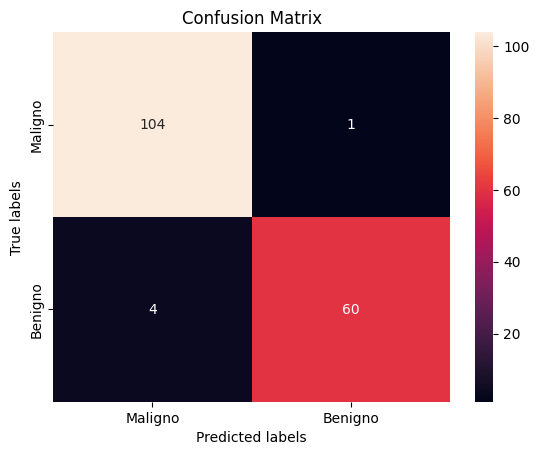

In [26]:
ax= plt.subplot()
# Calculo de la matriz de confusión
cm = confusion_matrix(y_test, Y_preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# Estetica del grafico
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Maligno', 'Benigno']); ax.yaxis.set_ticklabels(['Maligno', 'Benigno']);

Se puede notar que hay 5 reconocimientos incorrectos donde se predice una etiqueta Maligno incorrectamente. Esto tiene un mayor peso en el casio de benigno, donde se predice un caso de Benigno cuando realmente es Maligno, ya que tiene mayor gravedad reconocer una muestra como benigna como maligna a que la inversa. 

## Parte 3: Regresión Logística (20 Pts.)

### 3.1 Teoría Regresión Logística (10 pts)
Al igual que con Perceptron, investiga sobre `Regresión Lógistica` y da una explicación con tus propias palabras de cómo funciona. Nuevamente no se espera una demostración matemática, el objetivo es que demuestres tu aprendizaje. Puedes apoyarte de las siguientes preguntas guía: ¿Qué es? ¿Qué tipo de problemas resuelve? ¿Cómo se calcula la probabilidad? ¿Qué función de activación utiliza? ¿Qué se busca durante el proceso de entrenamiento? ¿Qué son los coeficientes? ¿Cómo se toma la decisión final de clasificación? ¿Cuál es la relación con la regresión lineal? 

La regresión logistica es un modelo matematico que dealiza predicciones sobre una variable en base a otras variables independientes. El modelo se puede describir matematicamente de la siguiente forma:

$log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$

donde $p$ es la probabilidad de que ocurra un evento, $\beta_0, \beta_1, ...$ son los coeficientes del modelo y $x_1, x_2, ...$ son las variables independientes. La función de activación de la regresión logistica es la función sigmoide, que transforma la suma ponderada de los inputs y los pesos en un valor entre 0 y 1, que representa la probabilidad de que ocurra el evento.

Para ajustar los peses del modelo (o *biases*, $\beta_0,\beta_1...$) es necesario entrenar el modelo con datos previamente etiquetados. El objetivo de este proceso es encontrar los mejores coeficientes que ajusten la curva sigmoide de tal forma que se minimice la función de perdida. Para esto se utiliza el algoritmo de descenso de gradiente.

Los coeficientes ademas indican la importancia de cada caracteristica o variable independiente. A mayor valor absoluto de un coeficiente, mayor importancia tiene la variable asociada.

Para tomar la decisión de clasificación, se utiliza un umbral, frente al cual se compara la probabilidad calculada por el modelo. Generalmente, si la probabilidad es mayor o igual al umbral, se clasifica como 1, y si es menor, se clasifica como 0.

La regresión lineal se relaciona con la regresión logistica en que ambas utilizan una combinación lineal de los inputs y los pesos, sin embargo, la regresión logistica utiliza una función de activación no lineal (sigmoide), mientras que la regresión lineal no. Además, la regresión lineal se utiliza para predecir valores continuos, mientras que la regresión logistica se utiliza para predecir probabilidades de pertenencia a una categoría binaria.

### 3.2 Crear y entrenar el modelo (3 Pts.)

Crea y entrena un modelo de regresion logistica con los datos de entrenamiento, donde a traves del parametro `solver`, deberas elegir minimo 3 opciones diferentes de algoritmos de optimizacion, responder `cuales son sus principales diferencias` respecto a como actualizan los parametros del modelo y `dar una hipotesis` sobre cual crees que sera el algoritmo que funcione mejor para este dataset. Recuerda que la idea es que `justifiques tu respuesta`.

La implementación de sklearn de regresión logistica utiliza el algoritmo de descenso de gradiente para optimizar los pesos del modelo. El parametro `solver` permite elegir el algoritmo de optimización a utilizar. Los algoritmos disponibles y sus formas de modificar los parametros del modelo son:
- `newton-cg`: utiliza el método de Newton para encontrar el mínimo de la función de perdida.
- `lbfgs`: es un analogo del metodo de newton, aproxima la matriz de Hessian utilizando actualizaciones dadas por la gradiente.
- `liblinear`: aplica selecion automatica de parametros (regularización L1) y se recomienda para datasets de alta dimensionalidad.
- `sag`: optimiza una suma finita de funciones convexas suaves.
- `saga`: variante de de sag, que soporta la penalidad no suave, L1.

Las recomendaciones de la libreria respecto al uso de los solvers es: 

> - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;  
> - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;  
> - ‘liblinear’ is limited to one-versus-rest schemes.  
> - ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

De lo anterior, considero que sería interesante probar con liblinear ya que el dataset cuenta con menos de mil datos, y comparar con lbfgs y saga que son más rápidos para datasets grandes. Se espera que los mejores resultados se obtengan con lbfgs o saga.

referencias :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

In [39]:
from sklearn.linear_model import LogisticRegression

solvers : list = ['lbfgs', 'liblinear', 'saga'] # Solvers a comparar
logistic_models : list = [] # Lista de modelos entrenados

for solver in solvers:
    model = LogisticRegression(solver=solver, random_state=42)
    model.fit(X_train, y_train)
    logistic_models.append(model)
    y_pred = model.predict(X_test)
    print(f'{solver} : {model.score(X_test, y_test)}')

lbfgs : 0.9704142011834319
liblinear : 0.9644970414201184
saga : 0.9704142011834319


Se puede comprobar que utilizando los valores default de regresion logistica (penalidad L2) se obtiene que lbfgs y saga son los solvers con mejores resultados para este dataset.

### 3.3 Evaluar el modelo (2 Pts.)

Para `cada uno` de los tres modelos anteriores, evalua el modelo con los datos de testing y calcula `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significan 👀.

In [51]:
# diccionario temporal para almacenar los resultados
comp = {'accuracy':[], 'precision':[], 'recall':[], 'f1_score':[], 'solver':[]}

for model in logistic_models:
    y_pred = model.predict(X_test)
    # print(f'{model} : {model.score(X_test, y_test)}')
    comp['accuracy'].append(accuracy_score(y_test, y_pred))
    comp['precision'].append(precision_score(y_test, y_pred))
    comp['recall'].append(recall_score(y_test, y_pred))
    comp['f1_score'].append(f1_score(y_test, y_pred))
    comp['solver'].append(model.solver)
# se transforma en dataframe para mostrar los resultados
comp = pd.DataFrame(comp)
comp.index = comp['solver']
comp = comp.drop('solver', axis=1)
comp

,accuracy,precision,recall,f1_score
solver,,,,
lbfgs,0.970414,1.0,0.921875,0.95935
liblinear,0.964497,1.0,0.906250,0.95082
saga,0.970414,1.0,0.921875,0.95935


Se puede notar que el tanto en f1_score como en precision los valores se mantienen iguales sin importar el solver. La diferencia esta en accuracy, donde lbfgs y saga son iguales y liblinear es menor. También en recall, donde liblinear es menor que los otros dos.

### 3.4 Matriz de confusión (5 Pts.)

De los modelos elegidos previamente, escoja el que mejor funcione y genere una `matriz de confusión` del modelo y responda la siguiente pregunta:

1. ¿Que tan grave es el error que tenemos segun la matriz de confusión en el problema de cáncer de mama? ¿Por qué?

[Text(0, 0.5, 'Maligno'), Text(0, 1.5, 'Benigno')]

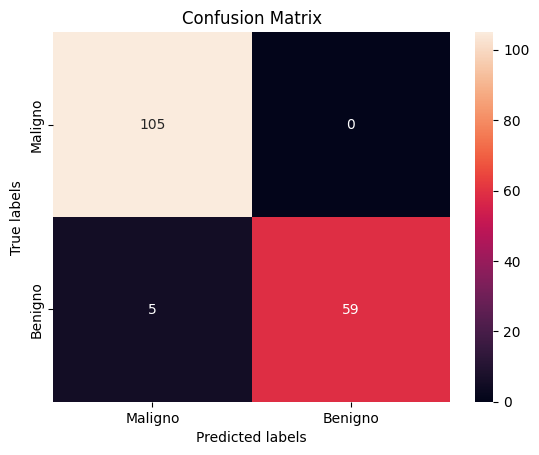

In [42]:
Y_preds = logistic_models[0].predict(X_test)

ax= plt.subplot()
cm = confusion_matrix(y_test, Y_preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Maligno', 'Benigno']); ax.yaxis.set_ticklabels(['Maligno', 'Benigno'])

In [54]:
log_accuracy, log_precision, log_recall, log_f1 = comp.loc['lbfgs']

En este caso hay 5 casos en los que se predice la etiqueta maligno par acasos benignos, esto no es tan grave, pero si lo es el caso contrario, donde se predice benigno para casos malignos, ya que esto puede retrasar el tratamiento de un paciente.

## Parte 4: Comparación de Modelos (5 Pts.)

### 4.1 Comparación de modelos (5 Pts.)
Una vez implementado cada modelo con los datos, compara los resultados obtenidos.
1. ¿Que modelo posee el mejor `rendimiento` en este caso? ¿Por qué?
2. ¿Qué métricas se utilizaron para comparar los modelos?
3. ¿Qué ventajas y desventajas tiene cada modelo?
4. ¿En que casos es mejor utilizar un modelo que otro? ¿Por qué?

1. Para comparar rendimiento, se realizara un dataframe donde se compararan las metricas evaluadas a lo largo de la tarea para cada modelo.

In [59]:
logistic_model : LogisticRegression = logistic_models[0]
type(mlp_model)

comparison = {'LogisticRegression [lbfgs]': [log_accuracy, log_precision, log_recall, log_f1], 'MLP': [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1]}
comparison = pd.DataFrame(comparison, index=['accuracy', 'precision', 'recall', 'f1_score'])
comparison['winner'] = comparison.apply(lambda x: 'MLP' if x['MLP'] > x['LogisticRegression [lbfgs]'] else 'LogisticRegression [lbfgs]', axis=1)
comparison


,LogisticRegression [lbfgs],MLP,winner
accuracy,0.970414,0.964497,LogisticRegression [lbfgs]
precision,1.000000,1.000000,LogisticRegression [lbfgs]
recall,0.921875,0.906250,LogisticRegression [lbfgs]
f1_score,0.959350,0.950820,LogisticRegression [lbfgs]


Se puede notar que LogisticRegression obtiene mejores resultados que MLP. Cabe decir que MLP se podria mejorar con un mejor ajuste de hiperparametros, aumento de capas ocultas y cambio en cantidad de neuronas por capas, pero aun asi en este caso, LogisticRegression obtiene mejores resultados.

2. Para comparar los modelos se utilizo accuracy, precision, recall y f1-score, todas basadas en los resultados de ambos modelos y fueron explicadas previamente.
3. MLP es un modelo mas complejo que LogisticRegression, por lo que puede tener mejores resultados pero es más dificil de entender y ajustar sus hiperparametros para optimizar su rendimiento. LogisticRegression es un modelo más simple, que puede ser más facil de entender y ajustar, pero puede tener peores resultados que MLP.
4. En este caso, LogisticRegression obtuvo mejores resultados que MLP, pero MLP puede ser mejor en otros casos, por ejemplo, cuando los datos no son linealmente separables.